In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('cwurData.csv', header=0)
print(data.shape)
data.head()


(2200, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Russian University

In [3]:
print(data['institution'][data['country'] == 'Russia'])

189              Lomonosov Moscow State University
247              Lomonosov Moscow State University
484              Saint Petersburg State University
1115                  Novosibirsk State University
1258             Lomonosov Moscow State University
1449    Moscow Institute of Physics and Technology
1605             Saint Petersburg State University
1954    National Research Nuclear University MEPhI
2184                  Novosibirsk State University
Name: institution, dtype: object


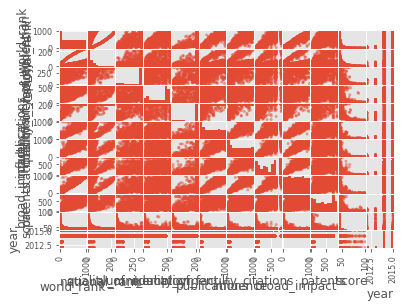

In [4]:
scatter_matrix(data)
pass

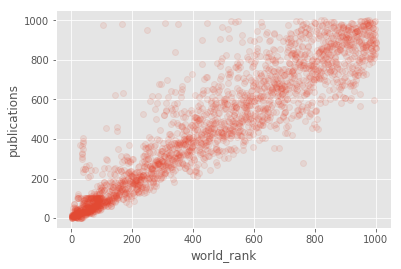

In [5]:
plt.plot(data['world_rank'], data['publications'], 'o', alpha=0.1)
plt.xlabel('world_rank')
plt.ylabel('publications')
pass

## Prepare data

In [6]:
data.drop(['institution', 'broad_impact', 'score'], axis=1, inplace=True)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country']
['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents', 'year']


In [7]:
data[numerical_columns].count()

world_rank              2200
national_rank           2200
quality_of_education    2200
alumni_employment       2200
quality_of_faculty      2200
publications            2200
influence               2200
citations               2200
patents                 2200
year                    2200
dtype: int64

In [8]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country']


In [9]:
data['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [10]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Belgium', 'country_Brazil', 'country_Bulgaria',
       'country_Canada', 'country_Chile', 'country_China', 'country_Colombia',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Egypt', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hong Kong', 'country_Hungary',
       'country_Iceland', 'country_India', 'country_Iran', 'country_Ireland',
       'country_Israel', 'country_Italy', 'country_Japan', 'country_Lebanon',
       'country_Lithuania', 'country_Malaysia', 'country_Mexico',
       'country_Netherlands', 'country_New Zealand', 'country_Norway',
       'country_Poland', 'country_Portugal', 'country_Puerto Rico',
       'country_Romania', 'country_Russia', 'country_Saudi Arabia',
       'country_Serbia', 'country_Singapore', 'country_Slovak Republic',
       'country_Slovenia', 

In [25]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [26]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary), axis=1), dtype=int)
print(data.shape)
print(data.dtypes)

(2200, 69)
world_rank                      int32
national_rank                   int32
quality_of_education            int32
alumni_employment               int32
quality_of_faculty              int32
publications                    int32
influence                       int32
citations                       int32
patents                         int32
year                            int32
country_Argentina               int32
country_Australia               int32
country_Austria                 int32
country_Belgium                 int32
country_Brazil                  int32
country_Bulgaria                int32
country_Canada                  int32
country_Chile                   int32
country_China                   int32
country_Colombia                int32
country_Croatia                 int32
country_Cyprus                  int32
country_Czech Republic          int32
country_Denmark                 int32
country_Egypt                   int32
country_Estonia                 int32
c

Train and test datasets

In [27]:
X = data.drop(['world_rank'], axis=1)
y = data['world_rank']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(2200, 68) (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

## KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [30]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.12424242424242424 0.1383116883116883


In [34]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.16060606060606064 5


In [35]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

0.12121212121212122 0.1512987012987013


## SVC

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test = np.mean(y_test != svc.predict(X_test))

print(err_train, err_test)

0.14545454545454545 0.15


In [37]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid={'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.13030303030303025 100.0


In [38]:
svc = SVC(C=best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

0.12121212121212122 0.1512987012987013


## Random Forest

In [39]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

C:\Users\mikhailm\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.04696969696969697 0.1331168831168831


## Значимость признаков

In [40]:
a = [1, 2, 5, 70, 32, 3, 4, 7, 234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [41]:
np.sum(rf.feature_importances_)

1.0000000000000007

In [42]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_name[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'publications' (0.216026)
 2. feature 'influence' (0.162917)
 3. feature 'citations' (0.114707)
 4. feature 'alumni_employment' (0.087555)
 5. feature 'patents' (0.064908)
 6. feature 'quality_of_faculty' (0.061887)
 7. feature 'quality_of_education' (0.055781)
 8. feature 'national_rank' (0.026048)
 9. feature 'country_USA' (0.018888)
10. feature 'country_China' (0.016506)
11. feature 'country_India' (0.012169)
12. feature ' year' (0.010817)
13. feature 'country_United Kingdom' (0.010171)
14. feature 'country_Japan' (0.008722)
15. feature 'country_South Korea' (0.008583)
16. feature 'country_Germany' (0.008404)
17. feature 'country_Iran' (0.008380)
18. feature 'country_France' (0.007456)
19. feature 'country_Spain' (0.006400)
20. feature 'country_Italy' (0.006318)
21. feature 'country_Brazil' (0.005904)
22. feature 'country_Taiwan' (0.005620)
23. feature 'country_Chile' (0.005290)
24. feature 'country_Australia' (0.005281)
25. feature 'country_Poland' (0.0

In [43]:
feature_name[[1, 0, 1]]

Index(['quality_of_education', 'national_rank', 'quality_of_education'], dtype='object')

(-1, 20)

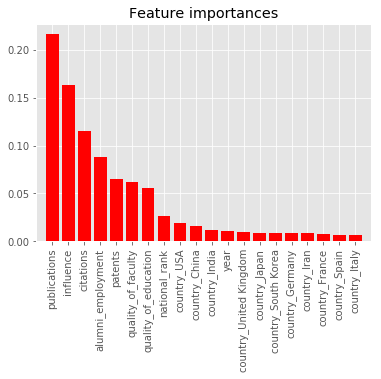

In [44]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='r')
plt.xticks(range(d_first), feature_name[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

## Extremely Randomized Trees

In [45]:
ert = ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

0.04696969696969697 0.14285714285714285


## AdaBoost

In [46]:
ada = ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.1606060606060606 0.1564935064935065


## GBT

In [47]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.04696969696969697 0.13506493506493505
